<a href="https://colab.research.google.com/github/Fayedyamani107/latihan--DAA/blob/main/latihan_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
nterms = int(input("How many terms?"))
n1, n2 = 0, 1
count = 0

# check if the number of terms is valid
if nterms <= 0:
    print("Please enter a positive integer")
elif nterms == 1:
    print("Fibonacci sequence up to", nterms, ":")
    print(n1)
else:
    print("Fibonacci sequence:")
    while count < nterms:
        print(n1)
        nth = n1 + n2
        n1 = n2
        n2 = nth
        count += 1


How many terms?20
Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [81]:
#fibonacci with rekursion

def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 30

if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequence:")
  for i in range(nterms):
    print(recur_fibo(i))

Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [82]:
#fibonacci dengan rekursi

def recur_fibo(n):
  if n <=1:
    return n
  else:
    return(recur_fibo(n-1)+recur_fibo(n-2))

  nterms = 20

  #cek apakah nilai nterms valid
  if nterms <= 0:
    print("Please enter a positive integer")
  else:
    print("fibonacci sequence")
    for i in range(nterms):
      print(recur_fibo(i))

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [84]:
#try all tours (exact_TSP)
def exact_TSP(cities):
  "generate all posible tours of the cities and choose the shortest one."
  return shortest(alltours(cities))

def shortest(tours):
  "return the tout eith the minimum total distance"
  return min(tours, key=total_distance)

In [85]:
#representing tours
alltours=itertools.permutations # the permutation function is already defined i the itertools module

cities = {1, 2, 3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [86]:
alltours({1,2,3,4})

In [87]:
#representing cities and distance
def total_distance(tour):

  "the total distance between each pair of consecutive cities in the tour"
  return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [88]:
City = complex #constructor for new cities , e.g. City(300, 400)

def distance (A, B):
  "the distance between two points."
  return abs(A-B)


A=City(300, 0)
B=City(0, 400)
distance(A, B)

500.0

In [89]:
def Cities(n):
  "make a set of n cities, each with random coordinates"
  return set(City(random.randrange(10, 890), random.randrange(10, 590))for c in range(n))

#lets make some standard sets of cities of various sizes.
#we'll set the random seed so that these sets are the same every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [90]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [91]:
#try all non-redunant tours
def alltours(cities):
  "return a list of tours, each a permutation of cities, but  each one starting with the same city"
  start=first(cities)
  return [[start]+list(tour)
    for tour in itertools.permutations(cities-{start})]

def first(collection):
  "start iteraating over collection, and return the first element"
  for x in collection: return x

alltours({1, 2, 3})
alltours({1, 2, 3, 4})
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


In [92]:
from re import A
#greedy algorithm

def greedy_algorithm(cities, start=None):
  C = start or first(cities)
  tour = [C]
  unvisited = set(cities - {C})
  while unvisited:
    C = nearest_neighbor(C_unvisited)
    tour.append(C)
    unvisited.remove(C)
    return tour
    def first(collection): return next(iter(collection))
    def nearest_neighbor(A,cities):
      return min(cities, key=lambda C: distence_points(C,A))

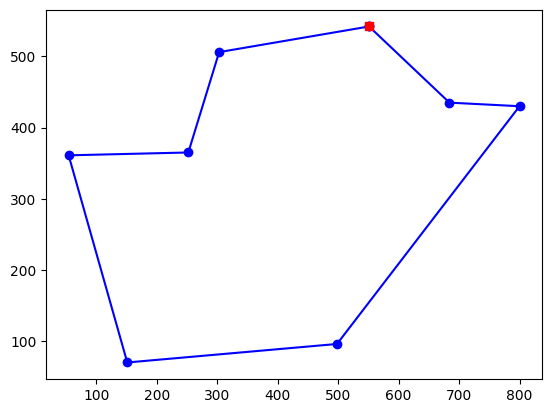

8 city tour; total distance = 1990.4; time = 0.025 secs for exact_TSP


In [93]:
import time
def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."

    t0 = time.time()
    tour = algorithm(cities)
    t1 = time.time()

    plotline(list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')
    plt.show()
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
        len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    plt.plot(X, Y, style)

def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

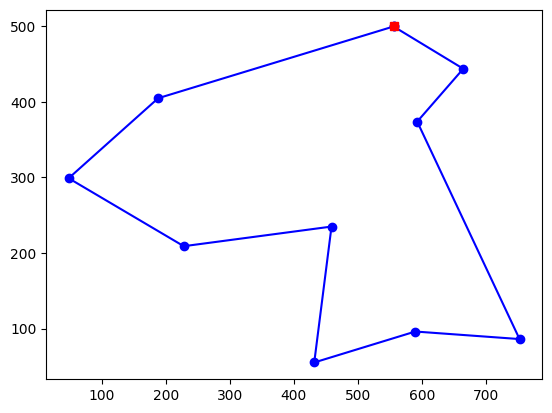

10 city tour; total distance = 2050.3; time = 2.800 secs for exact_TSP


In [94]:
plot_tour(exact_TSP, cities10)

In [95]:
#greedy nearest neighbor

def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited )
    tour.append
    unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
  "Find the cities that iss nearest to city A."
  return min(cities, key=lambda x: distance(x, A))

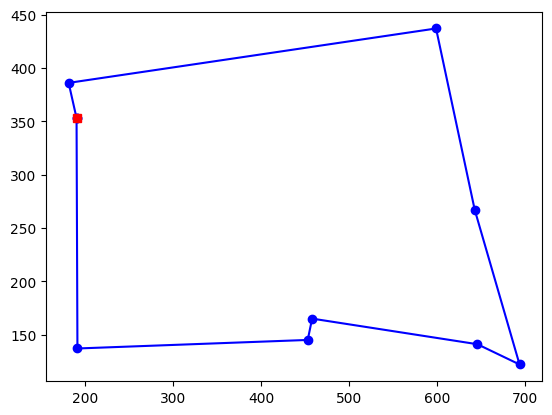

9 city tour; total distance = 1524.5; time = 0.161 secs for exact_TSP


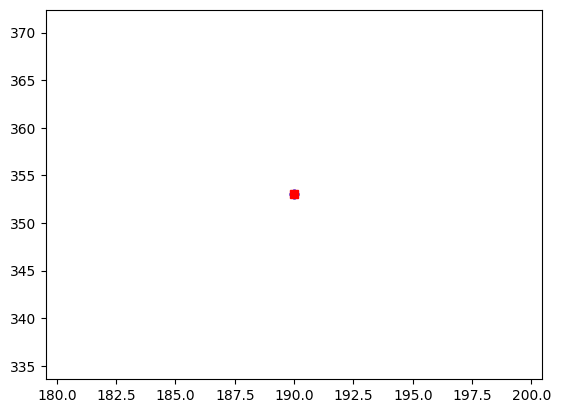

1 city tour; total distance = 0.0; time = 0.000 secs for greedy_TSP


In [96]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

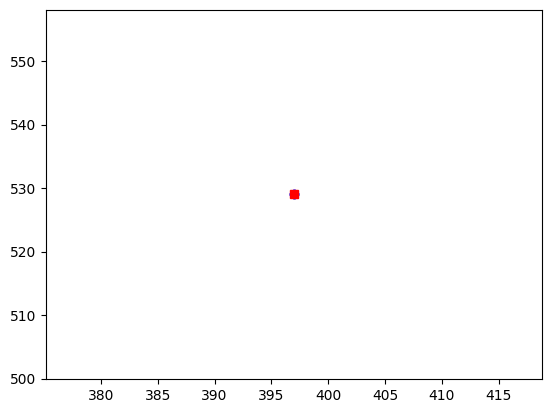

1 city tour; total distance = 0.0; time = 0.000 secs for greedy_TSP


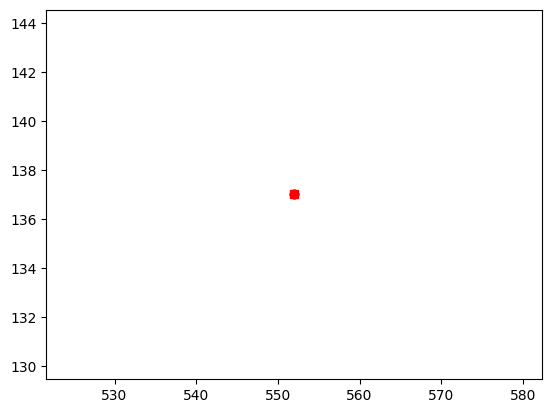

1 city tour; total distance = 0.0; time = 0.000 secs for greedy_TSP


In [97]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

In [98]:
#greedy nearest neighbor (greedy_tsp)
def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that in nearest to city A."
  return min(cities, key=lambda x: distance(x, A))

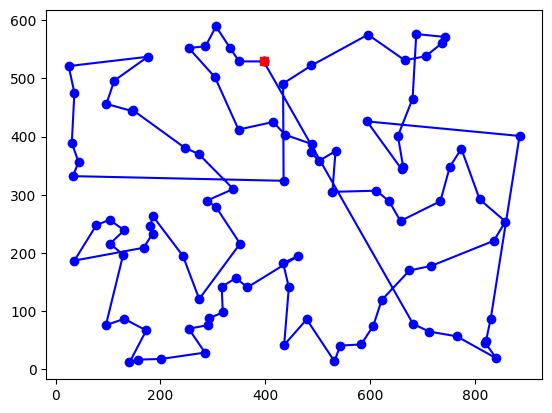

100 city tour; total distance = 6987.7; time = 0.002 secs for greedy_TSP


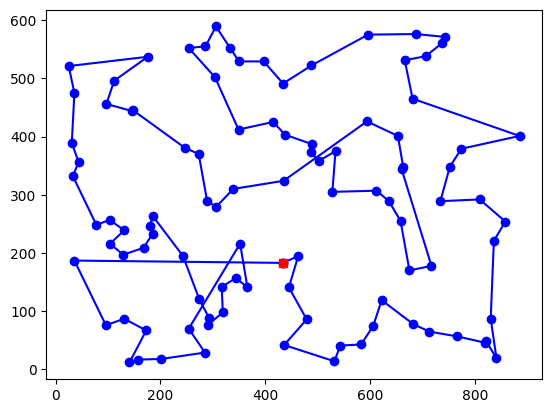

100 city tour; total distance = 6213.5; time = 0.146 secs for all_greedy_TSP


In [102]:
#Compare greedy_TSP to all_greedy_TSP
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [101]:
#algorithm 3: Greeedy Nearest neighbor from all starting points (all_greedy_TSP)
def all_greedy_TSP(cities):
  "Try the greedy algorithm from each of the starting cities; returnthe sortes tour."
  return shortest(greedy_TSP(cities, start=c) for c in cities)

#we will modify greedy_TSP to take an optional start city; otherwise it is unchanged.

def greedy_TSP(cities, start=None):
  "At each step, visit the nearest neighbor that is stil unvisited"
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour


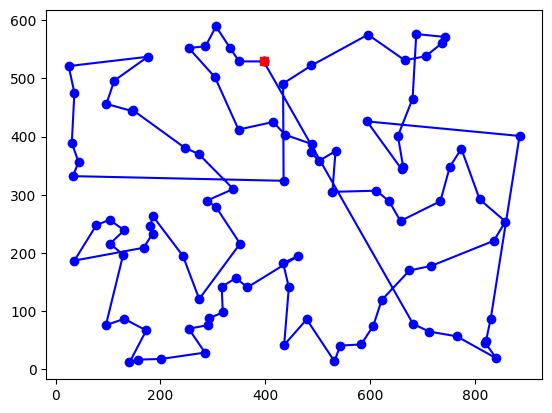

100 city tour; total distance = 6987.7; time = 0.002 secs for greedy_TSP


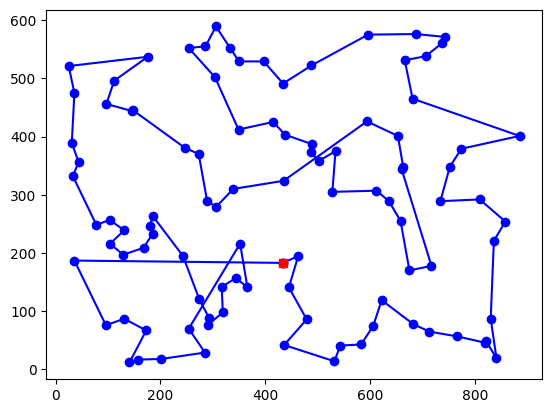

100 city tour; total distance = 6213.5; time = 0.146 secs for all_greedy_TSP


In [103]:
#Compare greedy_TSP to all_greedy_TSP
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [104]:
#algorithm 4: Greedy Nearest neighbor with exact End (greedy_exact_end_TSP)
def greedy_exact_end_TSP(cities, start=None, end_size=8):
  """At each step, visit the nearest neighbor that is still unvisited untill
  there are k_end cities left; then choose the best of all possible endings"""
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  #unvisited greedy algortihm fo all but the last end_size cities
  while len(unvisited) > end_size:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  #Consider all permutation of possible ends to the tour, and choose the best one.
  #(but to make things faster, omit the middle of the tour.)
  ends = map(list, itertools.permutations(unvisited))
  best = shortest([tour[0], tour[-1]] + end for end in ends)
  return tour + best[2:]

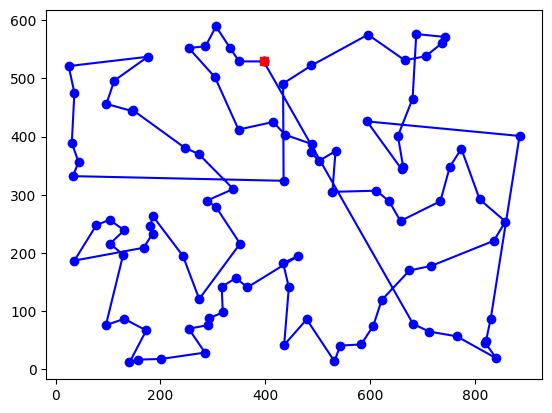

100 city tour; total distance = 6987.7; time = 0.160 secs for greedy_exact_end_TSP


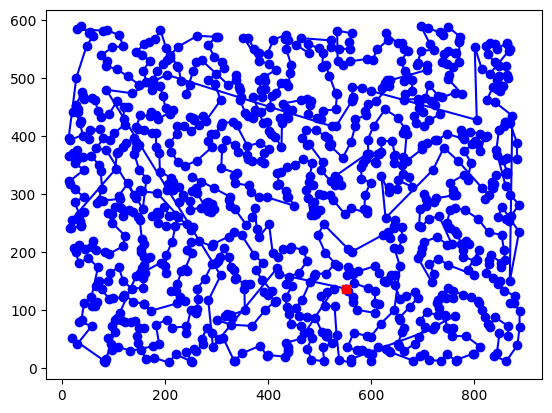

1000 city tour; total distance = 20171.0; time = 0.290 secs for greedy_exact_end_TSP


In [105]:
plot_tour(greedy_exact_end_TSP, cities100)
plot_tour(greedy_exact_end_TSP, cities1000)

In [106]:
#algorithm 5: greedy nearest neighbor with both end search (greedy_bi_TSP)
def greedy_bi_TSP(cities, start_size=12, end_size=6):
  "At each step, visit the nearest neighbor that is still unvisited"
  starts = random.sample(cities, min(len(cities), start_size))
  return shortest(greedy_exact_end_TSP(cities, start, end_size)
   for start in starts)

<ipython-input-106-3711e63b39cf>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


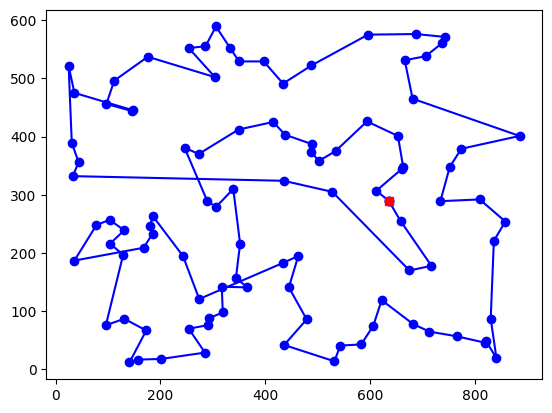

100 city tour; total distance = 6230.0; time = 0.052 secs for greedy_bi_TSP


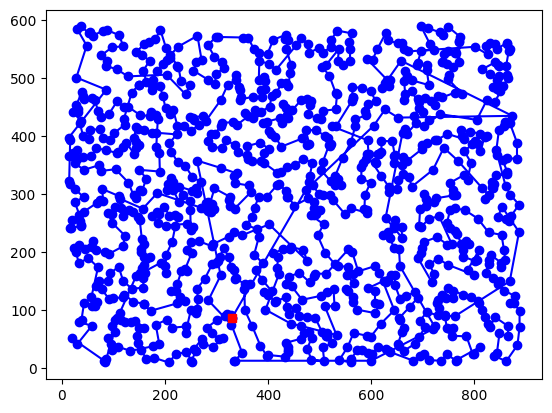

1000 city tour; total distance = 20070.7; time = 1.613 secs for greedy_bi_TSP


In [107]:
random.seed('bi')
plot_tour(greedy_bi_TSP, cities100)
plot_tour(greedy_bi_TSP, cities1000)

In [113]:
#benchmarking algorihtm
def compare_algorithms(algorithms, maps):
  "Apply each algorithm to each map and plot result."
  for algorithm in algorithms:
    t0 = time.time()
    results = [total_distance(algorithm(m)) for m in maps]
    t1 = time.time()
    avg = sum(results) / len(results)
    label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
    plt.plot(sorted(results), label=label)
  plt.legend(loc=2)
  plt.show()
  print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
  "Return a list of M maps, each consisting of a set N cities"
  return [Cities(N) for m in range(M)]

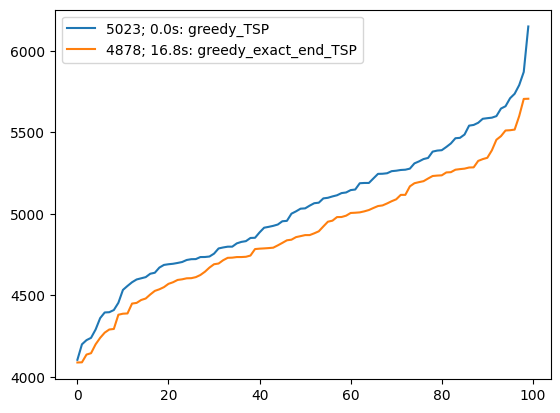

100 x 50-city maps


In [114]:
compare_algorithms([greedy_TSP, greedy_exact_end_TSP],  Maps(100, 50))

In [115]:
def bi_10_6(cities): return greedy_bi_TSP(cities, 10,6)
def bi_20_5(cities): return greedy_bi_TSP(cities, 20,5)
def bi_40_4(cities): return greedy_bi_TSP(cities, 40,4)
def bi_80_2(cities): return greedy_bi_TSP(cities, 80,2)
def bi_160_1(cities): return greedy_bi_TSP(cities, 160,1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_160_1]

<ipython-input-106-3711e63b39cf>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


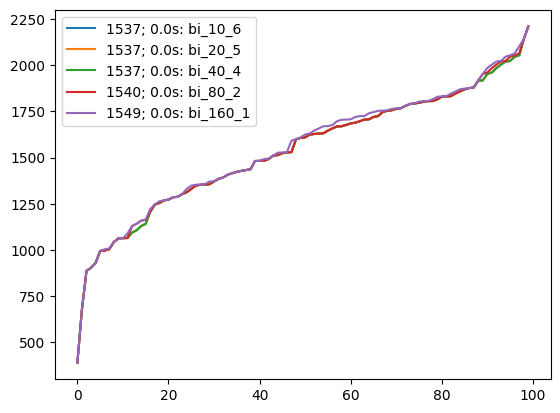

100 x 5-city maps


In [116]:
compare_algorithms(algorithms, Maps(100, 5))

<ipython-input-106-3711e63b39cf>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


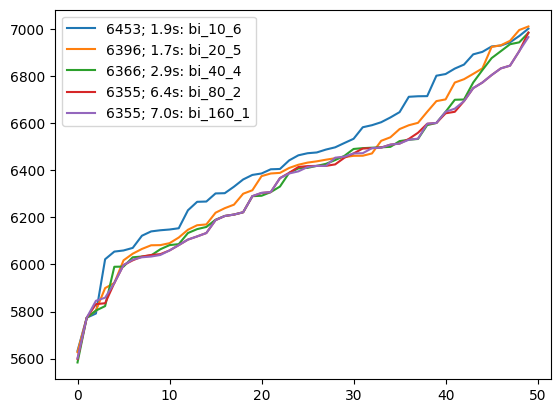

50 x 100-city maps


In [118]:
compare_algorithms(algorithms, Maps(50, 100))

<ipython-input-106-3711e63b39cf>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


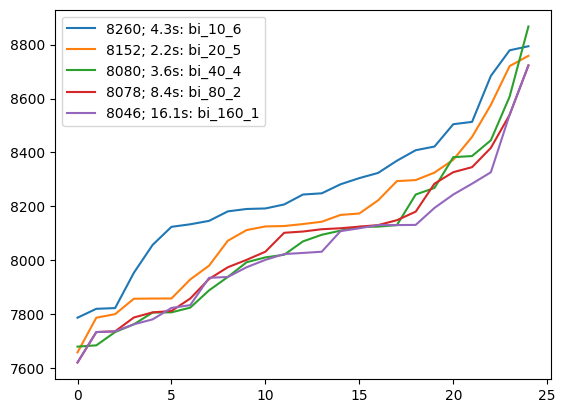

25 x 160-city maps


In [119]:
compare_algorithms(algorithms, Maps(25, 160))

In [121]:
string = 'BCAADDCCACACAC'

#CREATING tree nodes
class NodeTree(object):

  def __init__(self, left=None, right=None):
    self.left = left
    self.right = right

  def children(self):
    return (self. left, self.right)

  def nodes(self):
    return (self.left, self.right)

  def __str__(self):
    return '%s_%s' % (self.left, self.right)


In [126]:
def huffman_code_tree(node, left=True, binString=''):
  if type(node) is str:
    return {node: binString}
  (l, r) = node.children()
  d = dict()
  d.update(huffman_code_tree(l, True, binString + '0'))
  d.update(huffman_code_tree(r, False, binString + '1'))
  return d

In [127]:
#calculating frequecy
freq = {}
for c in string:
  if c in freq:
      freq[c] += 1
  else:
      freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
  (key1, c1) = nodes[-1]
  (key2, c2) = nodes[-2]
  nodes = nodes[:-2]
  node = NodeTree(key1, key2)
  nodes.append((node, c1 + c2))

  nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

print('Char | Huffman code')
print('--------------------')
for (char, frequency) in freq:
    print('%-4r |%12s' % (char, huffmanCode[char]))

Char | Huffman code
--------------------
'C'  |           0
'A'  |          11
'D'  |         101
'B'  |         100
